# [course website](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/)

# Intro

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random

# Binary classification problem

In [ ]:
# creating data
n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42
                    )

In [ ]:
x, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
circles = pd.DataFrame({'x0':x[:, 0],'x1':x[:, 1], 'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


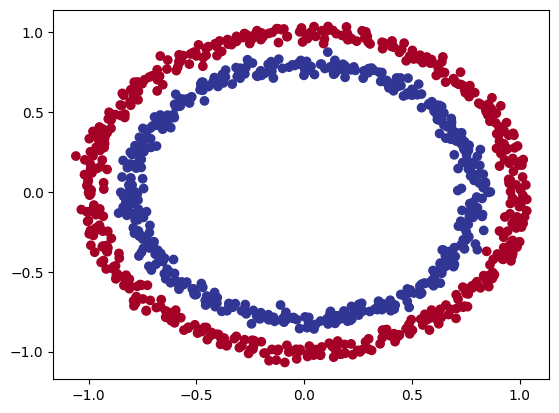

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_1.fit(x, y, epochs=5, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 4.7182 - accuracy: 0.4770


[4.718156337738037, 0.47699999809265137]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# preaty BAD
model_2.fit(x, y, epochs=200, verbose=0)
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4460


[0.6931487321853638, 0.44600000977516174]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.Input(shape=(2)))
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_3.fit(x, y, epochs=200, verbose=0)
model_3.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933282017707825, 0.5]

In [ ]:
model_3.predict(x)

32/32 [==============================] - 0s 2ms/step


array([[0.49563584],
       [0.48722357],
       [0.48690727],
       [0.48954812],
       [0.49324462],
       [0.48906255],
       [0.4917183 ],
       [0.49568227],
       [0.48991796],
       [0.49124914],
       [0.48744354],
       [0.4949726 ],
       [0.49115822],
       [0.49519253],
       [0.4943047 ],
       [0.49192727],
       [0.48593035],
       [0.49144912],
       [0.48672622],
       [0.48732746],
       [0.49505842],
       [0.48870897],
       [0.4906189 ],
       [0.49558318],
       [0.48655528],
       [0.48624906],
       [0.49348503],
       [0.49580866],
       [0.49227285],
       [0.4946932 ],
       [0.489047  ],
       [0.4906646 ],
       [0.49182904],
       [0.49689636],
       [0.49019894],
       [0.48735768],
       [0.4885099 ],
       [0.49422085],
       [0.49234295],
       [0.49582535],
       [0.48755983],
       [0.49387738],
       [0.4869667 ],
       [0.49579912],
       [0.48636085],
       [0.48607087],
       [0.4935985 ],
       [0.493

In [ ]:
# visualising
def plot_decision_boundary(model, x, y, verbose=1):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in, verbose=verbose)

  if model.output_shape[-1] > 1:
    if verbose:
      print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    if verbose:
      print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


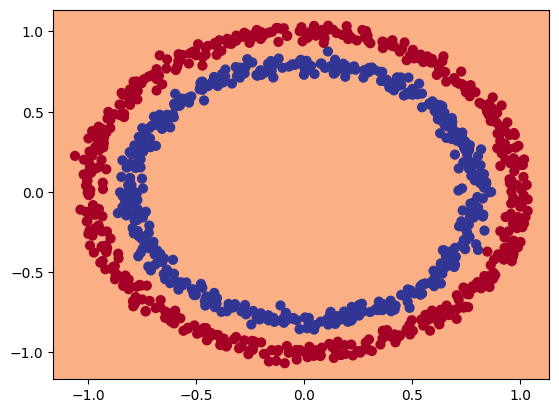

In [ ]:
plot_decision_boundary(model_3, x, y)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.7877 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7690 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7652 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7632 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7617 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7604 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7592 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7578 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7568 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7557 - accuracy: 0.4840
Epoch 11/

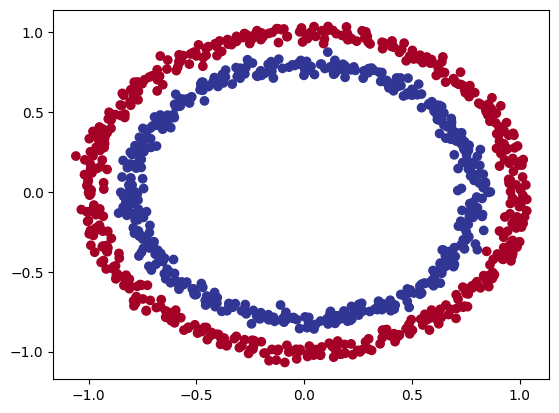

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


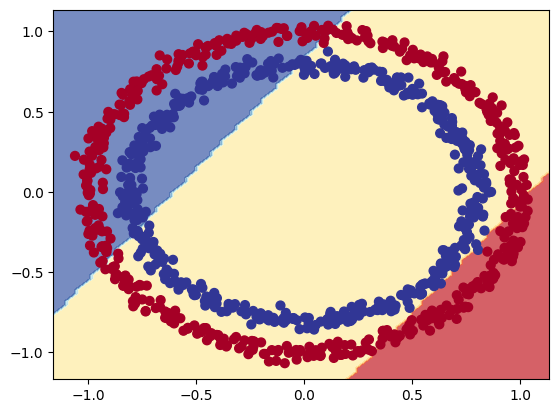

In [ ]:
plot_decision_boundary(model_4, x, y)

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(1, activation='relu'))

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
hist_m5 = model_5.fit(x, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


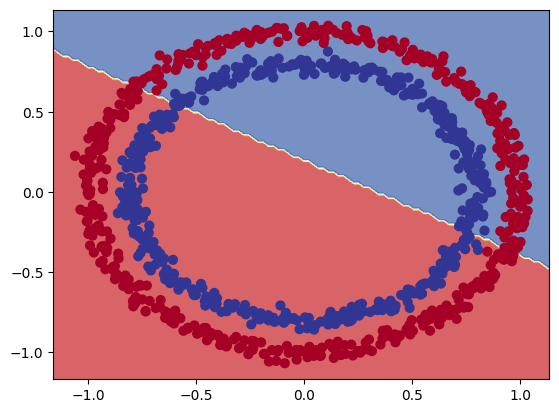

In [ ]:
plot_decision_boundary(model_5, x, y)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(5, activation='relu'))
model_6.add(tf.keras.layers.Dense(5, activation='relu'))

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
hist_m6 = model_6.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.2790


[0.6932041049003601, 0.27900001406669617]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification...


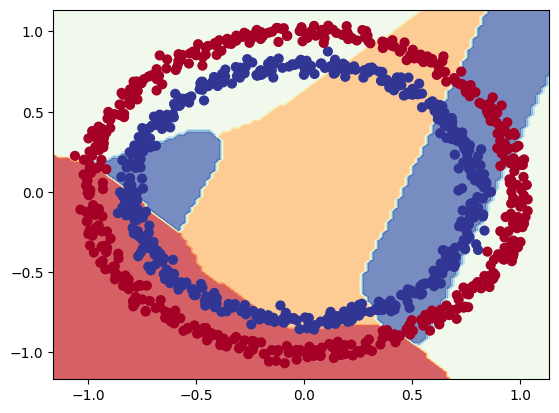

In [ ]:
plot_decision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(5, activation='relu'))
model_7.add(tf.keras.layers.Dense(5, activation='relu'))
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


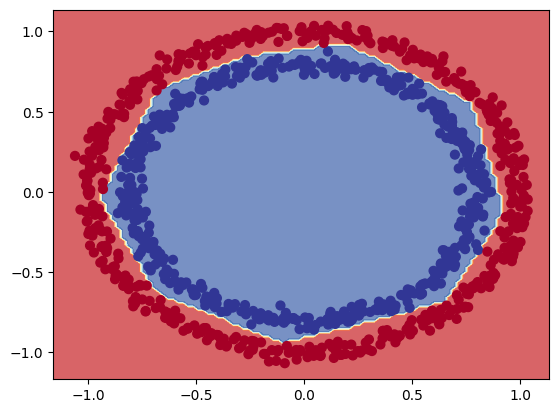

In [ ]:
hist_m7 = model_7.fit(x, y, epochs=500, verbose=0)
plot_decision_boundary(model_7, x, y)

In [ ]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000


[0.007249994669109583, 1.0]

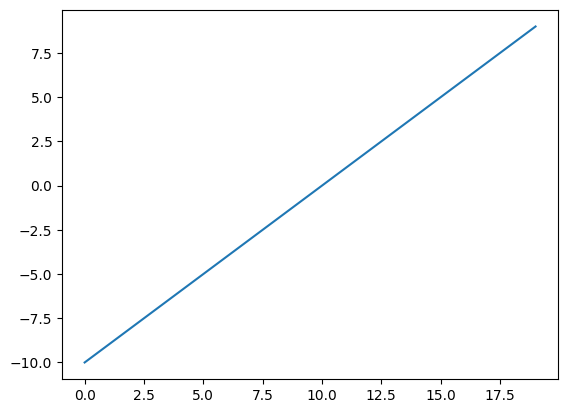

In [ ]:
a = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(a)

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

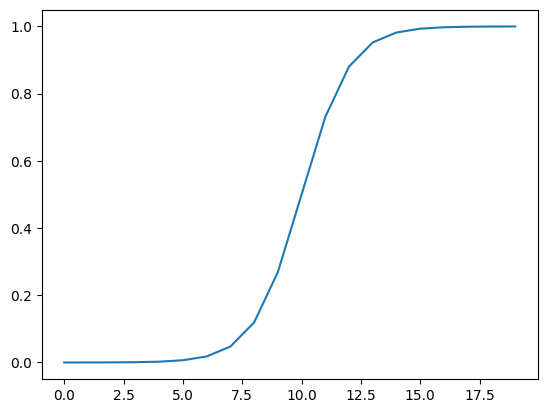

In [ ]:
plt.plot(sigmoid(a))

In [ ]:
def reLu(x):
  return tf.maximum(x, 0)

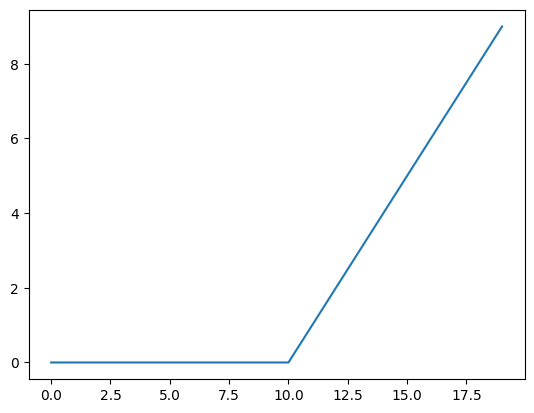

In [ ]:
plt.plot(reLu(a))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2, random_state=42
)
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Dense(5, activation='relu'))
model_8.add(tf.keras.layers.Dense(5, activation='relu'))
model_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

In [ ]:
hist_m8 = model_8.fit(x_train, y_train, epochs=200, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


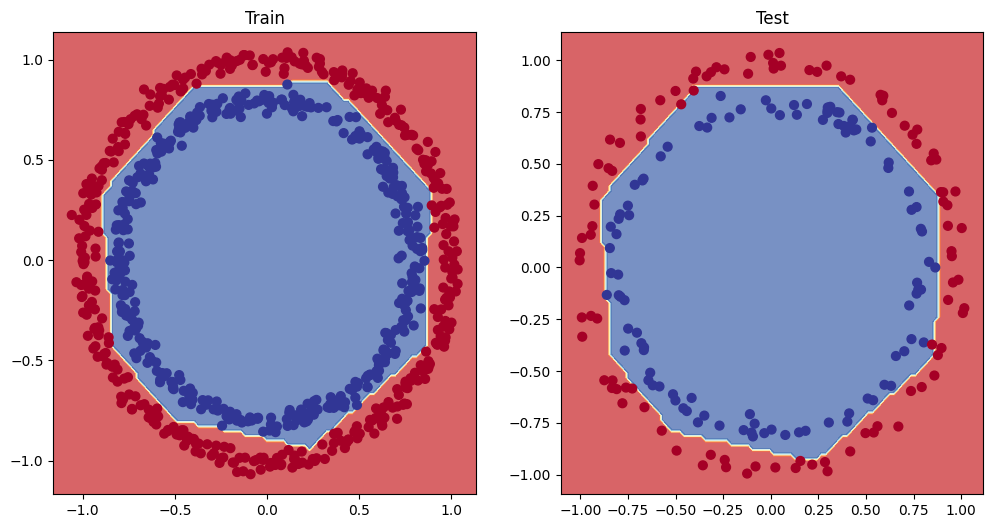

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)
plt.show()

In [ ]:
pd.DataFrame(hist_m8.history)

,loss,accuracy
0,0.692625,0.50875
1,0.690877,0.51750
2,0.689482,0.55625
3,0.688892,0.55125
4,0.687480,0.54875
...,...,...
195,0.045559,0.99875
196,0.044699,1.00000
197,0.044312,1.00000
198,0.043635,1.00000


Text(0.5, 0, 'epochs')

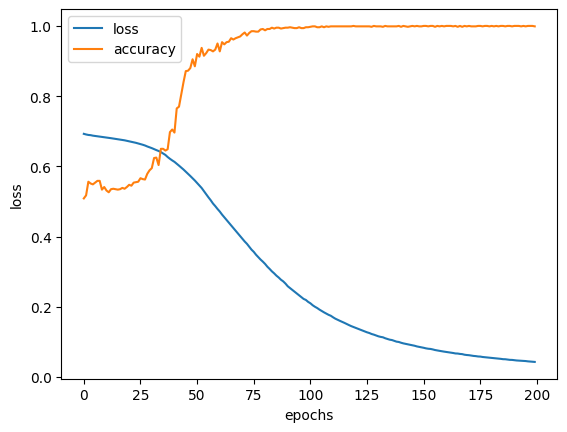

In [ ]:
pd.DataFrame(hist_m8.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0745 - accuracy: 0.9800


[0.07450608909130096, 0.9800000190734863]

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(5, activation='relu'))
model_9.add(tf.keras.layers.Dense(5, activation='relu'))
model_9.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

hist_m9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7332 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7265 - accuracy: 0.4725 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 0, 'epochs')

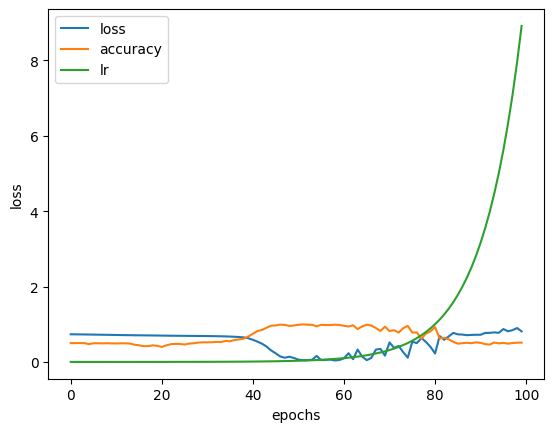

In [ ]:
pd.DataFrame(hist_m9.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

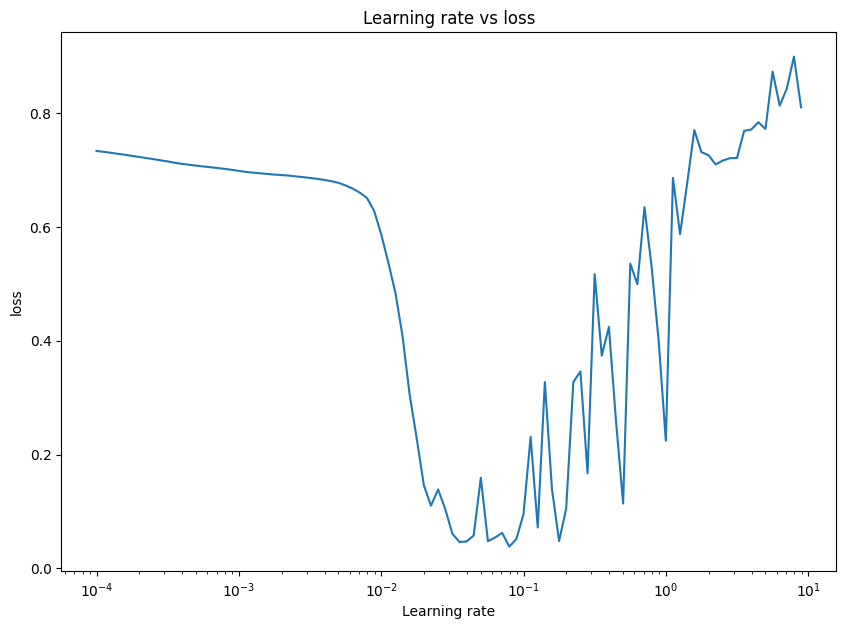

In [ ]:
# plot lr vs loss
lrs = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_m9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs loss')

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

hist_m10 = model_10.fit(x_train, y_train, epochs=200, verbose=0)

In [ ]:
def evaluate(model, name=0, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, verbose=0):
  loss, accuracy = model.evaluate(x_test, y_test, verbose=verbose)
  print('+' + '-'*30 + '+')
  print('|' + ' '*(7-len(str(name))//2) + 'MODEL ' + str(name) + ' EVALUATION' + ' '*(6-len(str(name))//2 - (len(str(name))%2)*1) + '|')
  print('|' + '.'*30 + '|')
  print('|' + ' '*2 + 'Loss: ' + str(loss) + ' '*2 + '|')
  print('|' + ' '*1 + 'Accuracy: ' + str(accuracy) + ' '*1 + '|')
  print('+' + '-'*30 + '+')
  print()
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title('Model ' + str(name) + ' Train set')
  plot_decision_boundary(model, x_train, y_train, verbose=verbose)
  plt.subplot(1, 2, 2)
  plt.title('Model ' + str(name) + ' Test set')
  plot_decision_boundary(model, x_test, y_test, verbose=verbose)
  plt.show()

+------------------------------+
|      MODEL 10 EVALUATION     |
|..............................|
|  Loss: 0.05414712056517601  |
| Accuracy: 0.9950000047683716 |
+------------------------------+



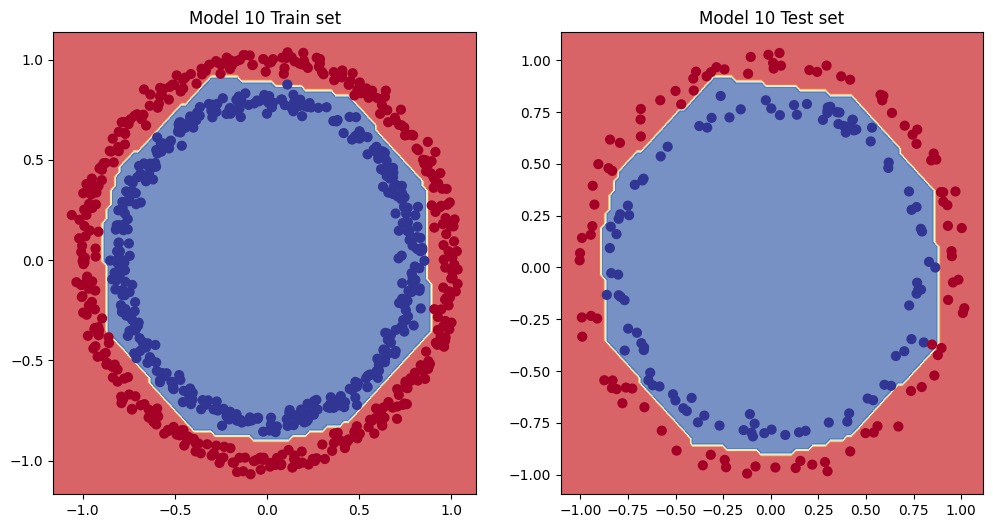

In [ ]:
evaluate(model_10, name=10)

In [ ]:
y_pred = model_10.predict(x_test)
# converting y_pred from probability of existing in class to binary
y_pred = tf.round(y_pred, 0)
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


array([[ 99,   1],
       [  0, 100]])

In [ ]:
def confiusion_matrix_graph(y_true, y_pred, text_size=15, figsize=(10, 7), classes=False):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  ax.set(
      title='Confiusion Matrix',
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)

  ax.title.set_size(25)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=text_size)

7/7 [==============================] - 0s 2ms/step


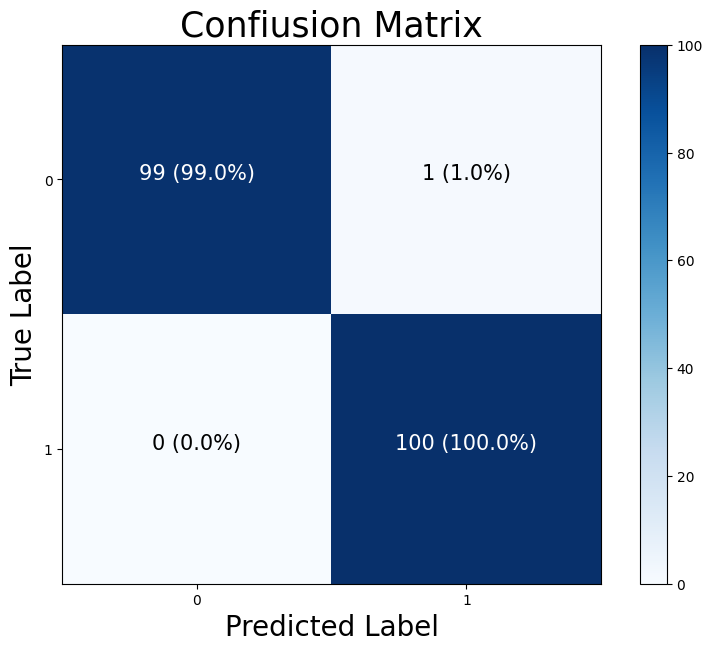

In [ ]:
confiusion_matrix_graph(y_test, tf.round(model_10.predict(x_test), 0))

# Multiclass cassification problem

In [ ]:
# Fashion DB
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0], train_labels[0], train_data.shape, train_labels.shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

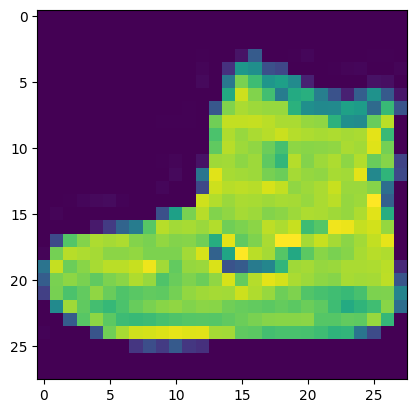

In [ ]:
plt.imshow(train_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

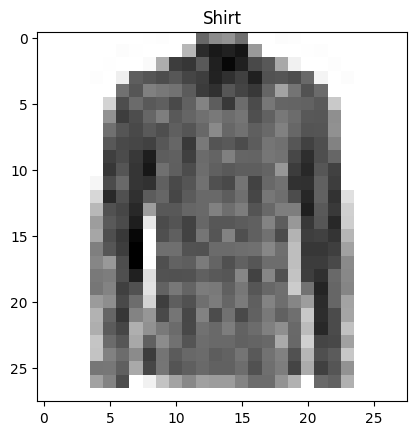

In [ ]:
index = 112
plt.imshow(train_data[index], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[index]]);

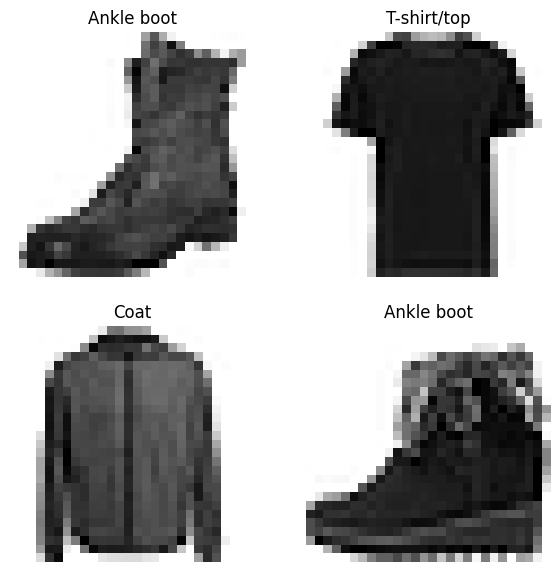

In [ ]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

fashion_1 = tf.keras.Sequential()

fashion_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
fashion_1.add(tf.keras.layers.Dense(5, activation="relu"))
fashion_1.add(tf.keras.layers.Dense(5, activation="relu"))
fashion_1.add(tf.keras.layers.Dense(10, activation="softmax"))

fashion_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

non_norm_hist_f1 = fashion_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.1758 - accuracy: 0.2078 - val_loss: 1.6858 - val_accuracy: 0.2410
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6106 - accuracy: 0.2789 - val_loss: 1.5539 - val_accuracy: 0.3154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5372 - accuracy: 0.3189 - val_loss: 1.5270 - val_accuracy: 0.3117
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5077 - accuracy: 0.3305 - val_loss: 1.4895 - val_accuracy: 0.3329
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4955 - accuracy: 0.3370 - val_loss: 1.5030 - val_accuracy: 0.3552
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4908 - accuracy: 0.3444 - val_loss: 1.4935 - val_accuracy: 0.3375
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4797 - accuracy: 0.3523 - val_loss: 1.4517 - val_accuracy:

In [ ]:
fashion_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 5)                 3925      
                                                                 
 dense_22 (Dense)            (None, 5)                 30        
                                                                 
 dense_23 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# squeezing data to be beetwen 0 and 1 (scaling/normalization)
train_data_norm = train_data/255.
test_data_norm = test_data/255.

In [ ]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

fashion_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_hist_f2 = fashion_2.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1509 - accuracy: 0.5559 - val_loss: 0.8303 - val_accuracy: 0.7039
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7452 - accuracy: 0.7357 - val_loss: 0.7119 - val_accuracy: 0.7498
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6634 - accuracy: 0.7657 - val_loss: 0.6572 - val_accuracy: 0.7689
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6259 - accuracy: 0.7777 - val_loss: 0.6481 - val_accuracy: 0.7789
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6050 - accuracy: 0.7845 - val_loss: 0.6215 - val_accuracy: 0.7884
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5923 - accuracy: 0.7898 - val_loss: 0.6368 - val_accuracy: 0.7812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5841 - accuracy: 0.7915 - val_loss: 0.6068 - val_accuracy:

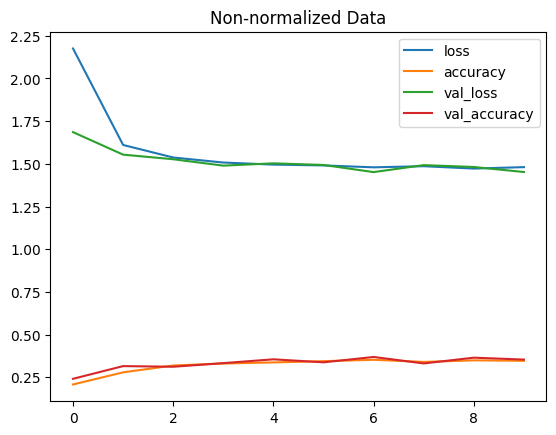

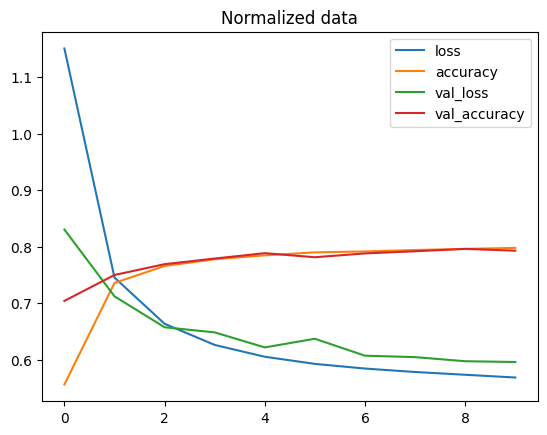

In [ ]:
pd.DataFrame(non_norm_hist_f1.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_hist_f2.history).plot(title="Normalized data");

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

tf.random.set_seed(42)

fashion_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

hist_f3 = fashion_3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3081 - accuracy: 0.4755 - val_loss: 0.8807 - val_accuracy: 0.6449 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7702 - accuracy: 0.7057 - val_loss: 0.7124 - val_accuracy: 0.7479 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6632 - accuracy: 0.7627 - val_loss: 0.6913 - val_accuracy: 0.7558 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6402 - accuracy: 0.7677 - val_loss: 0.6695 - val_accuracy: 0.7650 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6296 - accuracy: 0.7707 - val_loss: 0.6572 - val_accuracy: 0.7660 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6185 - accuracy: 0.7775 - val_loss: 0.6594 - val_accuracy: 0.7722 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

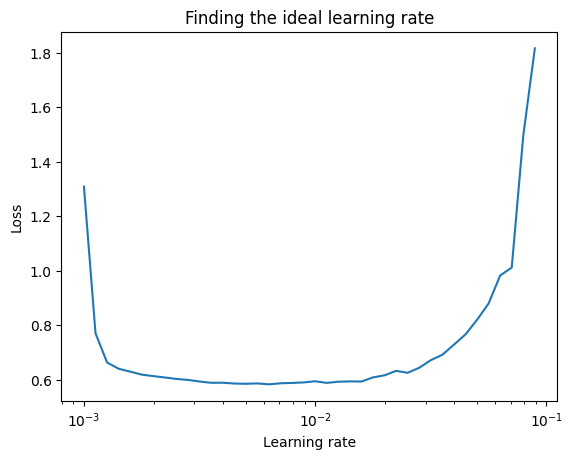

In [ ]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, hist_f3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# ideal learning rate: 0.003
tf.random.set_seed(42)

fashion_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.003),
                 metrics=["accuracy"])

hist_f4 = fashion_4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels),
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0341 - accuracy: 0.6115 - val_loss: 0.7653 - val_accuracy: 0.7276
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6967 - accuracy: 0.7593 - val_loss: 0.6911 - val_accuracy: 0.7682
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6310 - accuracy: 0.7834 - val_loss: 0.6542 - val_accuracy: 0.7789
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6035 - accuracy: 0.7942 - val_loss: 0.6280 - val_accuracy: 0.7876
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5876 - accuracy: 0.7983 - val_loss: 0.6297 - val_accuracy: 0.7831
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5756 - accuracy: 0.8026 - val_loss: 0.6148 - val_accuracy: 0.7956
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5673 - accuracy: 0.8061 - val_loss: 0.6129 - val_accuracy:

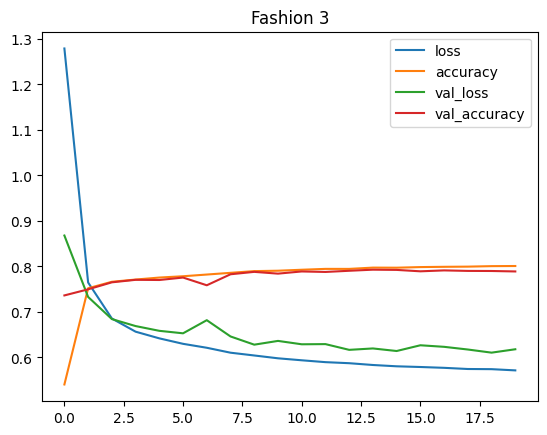

In [ ]:
pd.DataFrame(hist_f4.history).plot(title="Fashion 3");

In [ ]:
y_probs = fashion_4.predict(test_data)
y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

313/313 [==============================] - 0s 1ms/step


array([[340,  10,  74,  20, 125,   1, 415,   3,  11,   1],
       [  0, 963,   2,   9,  21,   0,   2,   0,   3,   0],
       [  1,   3, 485,   0, 475,   0,  24,   0,  12,   0],
       [  2, 144,   6, 504, 300,   1,  38,   0,   5,   0],
       [  0,   6,  21,   0, 968,   0,   3,   0,   2,   0],
       [  0,  48,   0,   0,   0, 316,   0,  33, 187, 416],
       [ 23,   5, 130,  15, 581,   2, 223,   0,  21,   0],
       [  0,   0,   0,   0,   0,   0,   0, 613,  11, 376],
       [  0,  15,  18,   5,  61,   1,   0,   3, 893,   4],
       [  0,   0,   0,   0,   0,   2,   0,   3,   2, 993]])

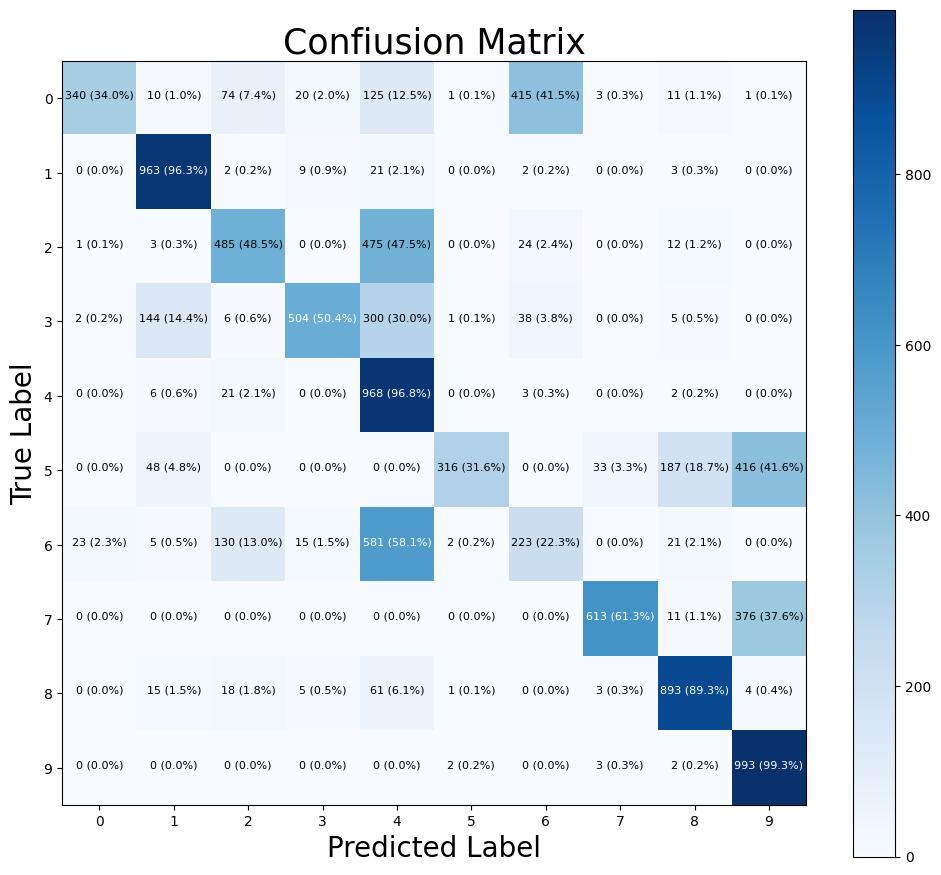

In [ ]:
confiusion_matrix_graph(test_labels, y_preds, text_size=8, figsize=(12, 11))

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 44ms/step


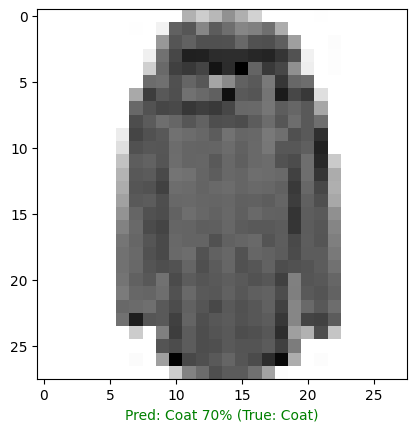

In [ ]:
plot_random_image(model=fashion_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

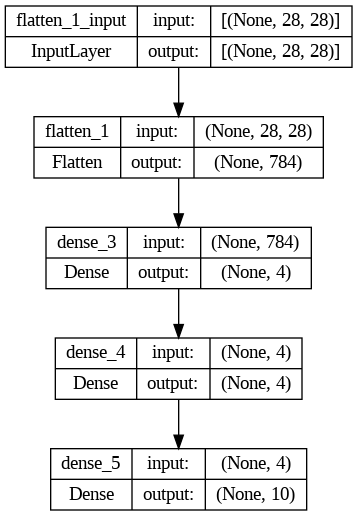

In [ ]:
plot_model(fashion_4, show_shapes=True)